In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/데이터/딥러닝

/content/drive/MyDrive/데이터/딥러닝


In [4]:
import os
import zipfile

# 개 고양이 이미지 자료 다운로드
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O  ./tmp/cats_and_dogs_filtered.zip

--2021-10-13 04:52:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 142.250.145.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./tmp/cats_and_dogs_filtered.zip’

./tmp/cats_and_dogs 100%[===================>]  65.43M  53.1MB/s    in 1.2s    

2021-10-13 04:52:19 (53.1 MB/s) - ‘./tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# 현재작업폴더 하위의 tmp폴더에 있는 zip 파일 압축해제
local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

print('--end---')

--end---


In [5]:
# 작업경로 설정

#-----------기본경로
base_dir = './tmp/cats_and_dogs_filtered'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print('end')

end


In [6]:
train_cats_dir

'./tmp/cats_and_dogs_filtered/train/cats'

In [7]:
# 데이터 확인
os.listdir(train_cats_dir)[:10]

['cat.127.jpg',
 'cat.126.jpg',
 'cat.125.jpg',
 'cat.124.jpg',
 'cat.123.jpg',
 'cat.122.jpg',
 'cat.121.jpg',
 'cat.120.jpg',
 'cat.119.jpg',
 'cat.118.jpg']

In [8]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)
test_cats_fnames=os.listdir(validation_cats_dir)    # test -> validation
test_dogs_fnames=os.listdir(validation_cats_dir)

In [9]:
# 데이터의 편향확인
# train데이터의 고양이와 강아지의 사진의 수 확인
# 검증용 데이터의 고양이와 강아지 사진의 수 확인

In [10]:
print(len(train_cats_fnames))
print(len(train_dogs_fnames))

1000
1000


In [11]:
print(len(test_cats_fnames))
print(len(test_dogs_fnames))

500
500


In [12]:
# 샘플사진 확인
# 이미지 읽고/출력
train_cats_fnames[0]

'cat.127.jpg'

In [13]:
train_dir

'./tmp/cats_and_dogs_filtered/train'

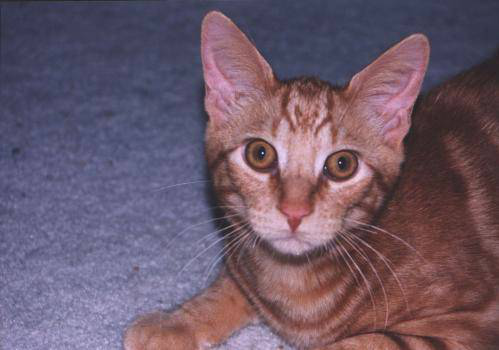

In [14]:
from PIL import Image
sample=train_cats_dir+'/'+train_cats_fnames[20]
Image.open(sample)

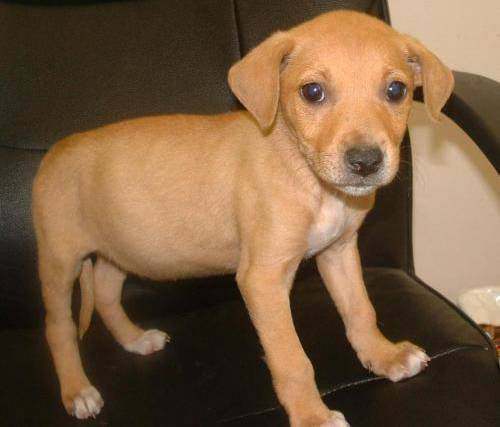

In [15]:
sample=train_dogs_dir+'/'+train_dogs_fnames[10]
Image.open(sample)

In [16]:
# 텐서플로우의 이미지 제너레이터를 이용하여서 데이터를 스케일링 함
# 이미지제너레이터 자료는 모델 fit할때 입력하는 훈련잘와 테스트자료에 사용
# 이작업에서는 사진의 회전, 확대 등 증강기술들이 사용되게 됨

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
# 훈련과 테스트(val)의 레이블이 필요함.
# 훈련과 테스트자료를 폴더단위로 배치만큼만 읽으면서 x, y값의 형태를 제작
# 폴더단위로 array를 append하고 폴더가 바뀌면 리스트 추가해서 다시 append

# 훈련자료 만들기
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')

# 테스트자료 만들기
test_generator=test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
import matplotlib.pyplot as plt
import numpy as np

len(train_generator)    # 트레이닝 전체자료는 1000+1000개의 2000개임 그중 배치를 20으로 하여서, 2000/20 => 100개로 나옴
len(test_generator)     # 1000/20 = 50개로 나옴

(150, 150, 3)

In [31]:
# 그림 1개는 기본적으로 [[[ 3개임
# [[[[ 는 4차원
np.shape(train_generator[0][0][0])

(150, 150, 3)

In [35]:
train_generator[0]

(array([[[[0.72156864, 0.8196079 , 0.9058824 ],
          [0.70980394, 0.8117648 , 0.87843144],
          [0.69411767, 0.8078432 , 0.83921576],
          ...,
          [0.882353  , 0.89019614, 0.8078432 ],
          [0.8862746 , 0.8941177 , 0.8117648 ],
          [0.89019614, 0.8980393 , 0.81568635]],
 
         [[0.7176471 , 0.8235295 , 0.8980393 ],
          [0.70980394, 0.81568635, 0.882353  ],
          [0.7137255 , 0.8313726 , 0.8745099 ],
          ...,
          [0.882353  , 0.89019614, 0.8078432 ],
          [0.8862746 , 0.8941177 , 0.8117648 ],
          [0.89019614, 0.8980393 , 0.81568635]],
 
         [[0.6862745 , 0.8000001 , 0.8705883 ],
          [0.64705884, 0.7607844 , 0.8313726 ],
          [0.6666667 , 0.78823537, 0.8588236 ],
          ...,
          [0.8745099 , 0.882353  , 0.8000001 ],
          [0.882353  , 0.89019614, 0.8078432 ],
          [0.89019614, 0.8980393 , 0.81568635]],
 
         ...,
 
         [[0.9686275 , 0.97647065, 0.89019614],
          [0.98039

In [36]:
# 사진이미지 pixcel값
# train_generator[0][0][0], train_generator[0][0][1], train_generator[0][0][2]

# 개, 고양이 레이블값
train_generator[0][1]   # cat은 0, dog는 1로 고양이와 개의 bool값

len(train_generator[1])     # 2로 출력되는 이유는 이미지자료를 갖고있는 array와 레이블 정보를 갖고있는 aata 2개 있음

len(train_generator)    # 배치단위 개수 -> 2

# train_generator[0], train_generator[1], train_generator[2]... train_generator[99] 해서 100개의 배치자료가 있음
# train_generator[0][0][0] => 0번째배치(0~19번째사진)의 사진중 사진이미지를 갖고있는 array의 첫번째 사진
# train_generator[0][1][0] => 0번째배치(0~19번째사진)의 사진중 레이블이미지를 갖고있는 array의 첫번째 레이블 값
# train_generator[1][0][0] => 1번째배치(20~39번째 사진)의 사진중 사진이미지를 갖고있는 attay의 첫번째 사진
# train_generator[99]...

2

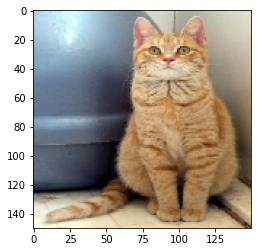

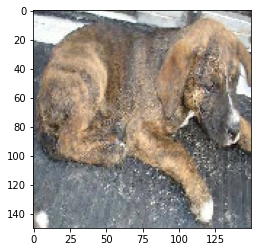

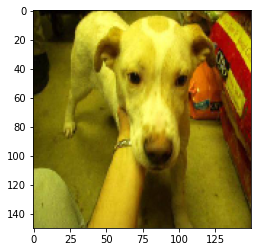

In [38]:
np.shape(train_generator[0][0][0])
for i in range(3):
    plt.imshow(train_generator[0][0][i])    # 
    plt.show()


In [54]:
# 모델 구축
# - 파람 계산 공식 -
# 첫번째 Param 계산공식(필터*필터*채널*유닛수+바이어스(유닛수))
# 두번째부터 Param계산공식 (필터*필터*  * 유닛수)+바이어스수(유닛수)

# OutPut Shape 계산공식
# (input shape수 - 필터 + 2*패딩수) / 스트라이드수 + 1
# 첫번째 (150-3+2*0)/1+1
# 두번째 (74-3+2*0)/1+1


from tensorflow.keras import layers,models

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3),              # 필터: 무작위의 값을 갖는 3*3의 픽셀임, 9개의 픽셀이 이미지의 각필셀과 곱셈
                        activation='relu',      # 즉, 3*3 필터가 3개의 패널을 모두 계산해야함. w값이 (3*3)*3*32+32개의 유닛개수
                        input_shape=(150,150,3)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))    #(3*3*32*64) + 64
model.add(layers.Conv2D(128,(3,3),activation='relu'))   #(3*3*64*128) + 128

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 144, 144, 128)     73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 이미지제너레이터 자료는 모델 fit할때 입력하는 훈령자료와 테스트자료에 사용함

In [56]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=test_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 104s 1s/step - loss: 0.6858 - acc: 0.5380 - val_loss: 0.6620 - val_acc: 0.6130
Epoch 2/30
100/100 [==============================] - 103s 1s/step - loss: 0.6424 - acc: 0.6235 - val_loss: 0.6154 - val_acc: 0.6700
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.5977 - acc: 0.6730 - val_loss: 0.5949 - val_acc: 0.6650
Epoch 4/30
100/100 [==============================] - 102s 1s/step - loss: 0.5605 - acc: 0.7115 - val_loss: 0.6077 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 102s 1s/step - loss: 0.5319 - acc: 0.7500 - val_loss: 0.5802 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 102s 1s/step - loss: 0.5075 - acc: 0.7565 - val_loss: 0.5548 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 104s 1s/step - loss: 0.4946 - acc: 0.7505 - val_loss: 0.6247 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

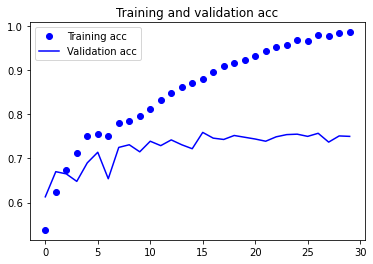

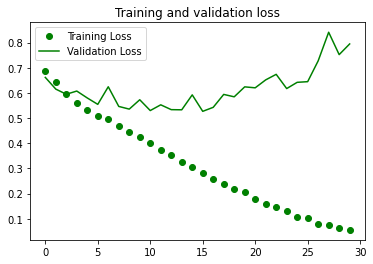

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [59]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def pred():
  uploaded=files.upload()

  for fn in uploaded.keys():

    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
      print(fn + " 사진은 강아지 입니다.")
    else:
      print(fn + " 사진은 고양이 입니다.")

In [66]:
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
test_datagen = ImageDataGenerator(rescale=1./255) 

In [61]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20, # batch_size는 한번 flow_from_directory가 실행 될 때 생성할 이미지 수
                                                    target_size=(150,150),#크기
                                                    class_mode = 'binary')# 0 or 1로 labelling

Found 2000 images belonging to 2 classes.


In [67]:
test_generator = test_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              target_size=(150,150),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [68]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))

In [69]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [70]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
